#### Introduction:

This notebook will explore the different neighborhoods of Pittsburgh and see the COVID cases (such as infections, reinfections, deaths, and hospitalization) that are associated with each neighborhood.

##### The Metric:
The goal of this notebook as stated above, is to find the neighborhood with the least amount of COVID stats. 
<br>
<br>
To accomplish this goal, we will explore the infections and reinfection statistics and add that to a total score for each neighborhood, as infections and reinfection statistic means that the person has had COVID, which means that you might get COVID from them. Additionally, reinfections also mean that the person got COVID a second time, meaning that they didn't learn from prior experience and will most likely be roaming around the neighborhood while infected with COVID.
<br>
<br>
Once we get add up the infections, we will subtract the deaths and hospitalizations statistics from the total, as those people will not be able to interact with you, since they are well, dead or in the hospital, which you should not be going into during a pandemic unless there is a medical emergency.
<br>
<br>
When we finally get all those statistics added up, the one with the smallest number will be the best neighborhood to be in, as they have the least amount of infections while having the most amount of dead/hospitalized people. Which means that the chance of interacting with someone with COVID will be the lowest.

In [3]:
# Importing some very useful stuff
import csv
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

covid = pd.read_csv("covid.csv") # Getting some data about COVID

Now that we have imported and gotten the dataset, we need to delete some columns that we won't be using, such as the antigen tests and polymerase chain reaction tests.

In [4]:
# delete the useless columns that we don't need to use
del covid['ag_tests'] 
del covid['positive_ag_tests']
del covid['pcr_tests']
del covid['positive_pcr_tests']
del covid['update_date']
del covid['postives']
del covid['tests']

Since the dataset takes into account all of Allegeny County, we need to get the Pittsburgh neighborhoods.
<br>
The dataset makes this easy, as the neighborhood column specifies whether or not they are in Pittsburgh, so we fliter out the ones that don't include Pittsburgh.

In [5]:
query_mask = covid.loc[:, 'neighborhood_municipality'].str.contains('Pittsburgh') # getting the ones that include Pittsburgh
covid_pitt_neighborhoods_only = covid[query_mask]
covid_pitt_neighborhoods_only.head()

,neighborhood_municipality,individuals_tested,infections,reinfections,deaths,hospitalizations
1,Allegheny Center (Pittsburgh),1011,1181,80,5,14
2,Allegheny West (Pittsburgh),349,392,61,0,5
3,Allentown (Pittsburgh),1489,2294,176,2,33
4,Arlington (Pittsburgh),1075,1736,216,9,29
5,Arlington Heights (Pittsburgh),148,149,11,3,3


Now we sort through the dataset and get all the neighborhood information. such as the infection, reinfections, deaths and hospitalizations. We are going to add up/subtract each statistic into their respective neighborhood, so we are going to end up with one massive number that includes the infection, reinfection, deaths and hospitalizations.

In [6]:
neighborhood_score = dict()
count = 0

# we put the number of infections into a dictionary for each neighborhood
for index, row in covid_pitt_neighborhoods_only.iterrows():
    
    neighborhood = covid_pitt_neighborhoods_only.iloc[count]['neighborhood_municipality'] # we count it by the count instaed of index as index gives us the location in the covid
                                                                                          # dataset and not the covid_pitt)neighborhoods_only dataset.
    infected = covid_pitt_neighborhoods_only.iloc[count]['infections'] 
    reinfected = covid_pitt_neighborhoods_only.iloc[count]['reinfections'] 
    deaths = covid_pitt_neighborhoods_only.iloc[count]['deaths'] 
    hospitalization = covid_pitt_neighborhoods_only.iloc[count]['hospitalizations']
    
    total = (infected) + (reinfected) - deaths - hospitalization # adds/subtract the stats into a neighborhood total

    neighborhood_score[neighborhood] = total # we don't need to see if the neighborhood is already in the dictionary
                                             # since we never loop through the list of neighborhoods more than once
    count += 1

After we finish creating the massive dictionary of neighborhoods, we want to sort the neighborhood by score going by ascending order, modify some of the names, and remove some neighborhoods that aren't actually neighborhoods, such as undefined.

In [7]:
# puts the dictionary we made of the covid infection cases into ascending order
covid_in_ascending_order = dict(sorted(neighborhood_score.items(), key = lambda item: item[1], reverse=False))


# remove the word (Pittsburgh) from the neighborhoods
doItHere = []
for neighborhood in covid_in_ascending_order:
    doItHere += [neighborhood]
    
for neighborhood in doItHere:
    new_name = neighborhood.replace("Pittsburgh",'').replace("(","").replace(")","").strip()
    covid_in_ascending_order[new_name] = covid_in_ascending_order.pop(neighborhood)

# we need it to say South Side Flats, not Southside Flats
covid_in_ascending_order["South Side Flats"] = covid_in_ascending_order.pop("Southside Flats")

# removing some neighborhoods that aren't in Pittsburgh
covid_in_ascending_order.pop("East")    
covid_in_ascending_order.pop("Undefined")

# prints out the dictionary of neighborhoods and their resepective scores
for neighborhood in covid_in_ascending_order:
    score = covid_in_ascending_order[neighborhood]
    print(f"{neighborhood} has a score of {score}.")

Chateau has a score of 85.
St. Clair has a score of 134.
Arlington Heights has a score of 154.
West End has a score of 219.
Hays has a score of 239.
South Shore has a score of 256.
Mt. Oliver has a score of 279.
Esplen has a score of 285.
Chartiers City has a score of 414.
Allegheny West has a score of 448.
Ridgemont has a score of 465.
North Shore has a score of 528.
Bon Air has a score of 560.
Homewood West has a score of 603.
Regent Square has a score of 623.
East Carnegie has a score of 643.
Spring Garden has a score of 661.
Oakwood has a score of 670.
California-Kirkbride has a score of 771.
New Homestead has a score of 811.
Fineview has a score of 869.
Polish Hill has a score of 914.
Swisshelm Park has a score of 924.
Summer Hill has a score of 970.
Windgap has a score of 1115.
Bedford Dwellings has a score of 1149.
Middle Hill has a score of 1170.
Allegheny Center has a score of 1242.
Northview Heights has a score of 1288.
Point Breeze North has a score of 1438.
Beltzhoover has 

Now that the dictionary is in sorted order, we are going to make a graph and eventually a heat map of the data.
<br>
Before we do that, we need to turn it into something that can print a graph and map, so the dictionary is going to be turned into a dataset.

In [8]:
# converting the dictionary into something we can make a graph from.
neighborhoodDf = pd.DataFrame(list(covid_in_ascending_order.items()),columns = ['neighborhood_municipality','Score'])

Let's see some of the worst scoring neighborhoods in Pittsburgh.

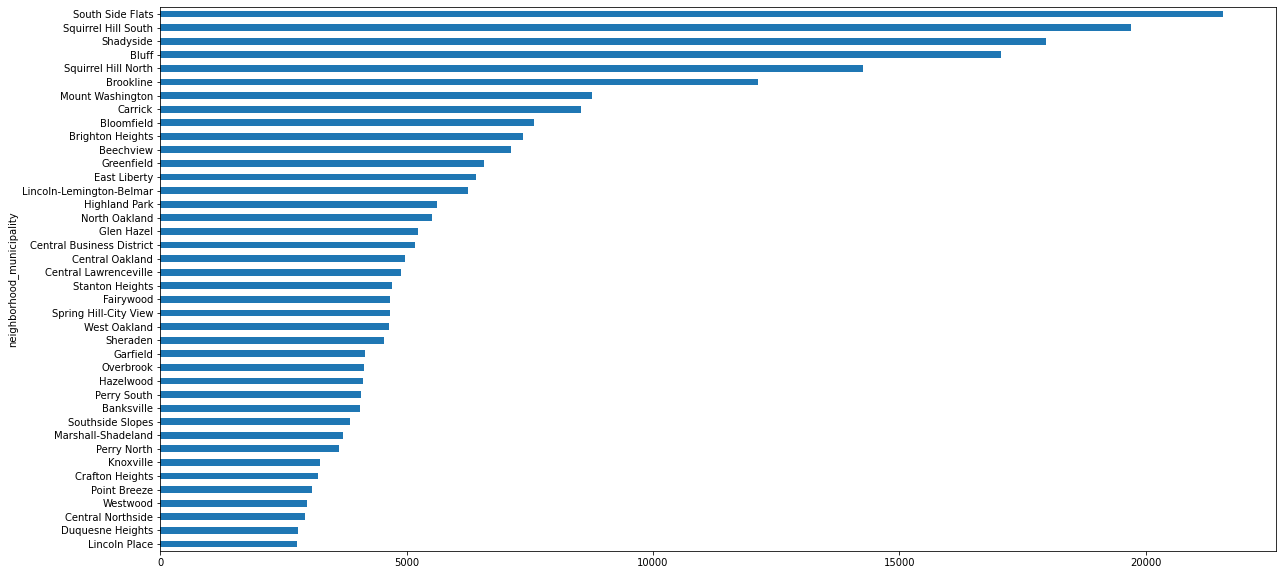

In [9]:
neighborhoodDf.iloc[50:92].plot(x = 'neighborhood_municipality',y = 'Score', kind = "barh", figsize = (20,10), stacked = True, legend = False)

Alrighty, now let's see the top 10 lowest scoring neighborhoods in Pittsburgh.

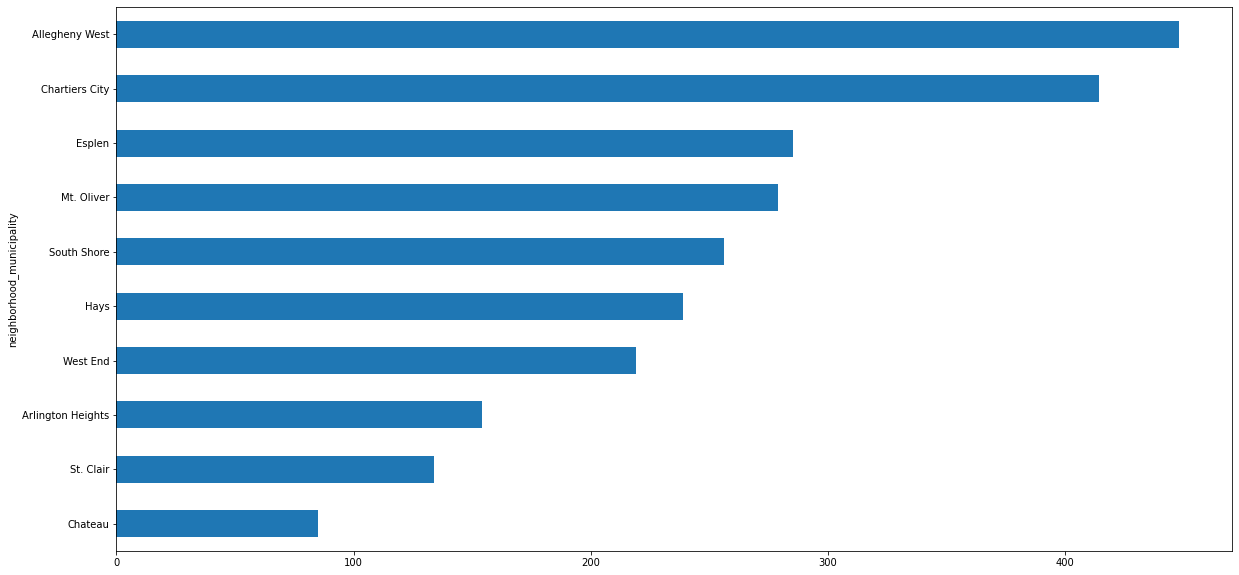

In [10]:
neighborhoodDf.iloc[0:10].plot(x ='neighborhood_municipality',y = 'Score', kind = "barh", figsize = (20,10), stacked = True, legend = False)

Now that we have the bar graph of the neighborhoods. We should put it into a map and see how the data looks.
<br>
To accomplish this, firstly we have to get a shapefile that contains the nieghborhoods. Then we combine our neighborhood dataset with that shapefile, which will give us a map that contains all the COVID scores, allowing an easier way to see the data visually.

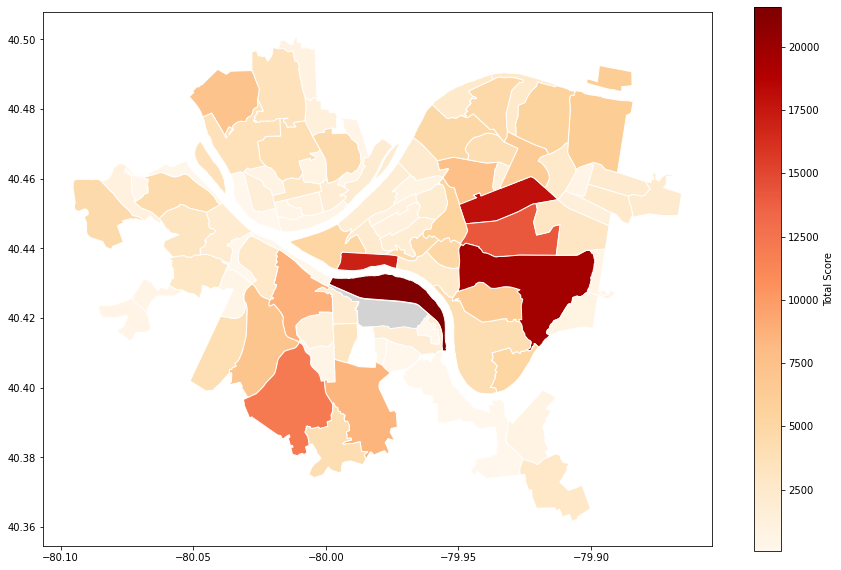

In [12]:
neighborhoods = gp.read_file("neighborhoods/Neighborhoods_.shp") # reads the neighborhood shape file.

# merging the neighborhood score data with the neighborhoods of Pittsburgh
covid_map = neighborhoods.merge(neighborhoodDf,how ='left', left_on ='hood', right_on = "neighborhood_municipality")
# Printing out a heat map of the neighborhoods and their scores.
covid_map.plot(column='Score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Total Score"},
              figsize=(15, 10),missing_kwds={"color": "lightgrey"})

So, the darker areas of the map are the neighborhoods with the higher scores, while the lighter regions are the locations with the loweer scores. Additionally, the darker areas tend to be in the center of Pittsburgh, while the lighter areas tend to be near the edges of the city.

### CONCLUSION:
As we saw during the bar graph and the list of scores and in the heat map (if you know where Chateau is), Chateu comes out as the best neighborhood to not get COVID in, as it had a score of 85, meaning that barely anyone got COVID, or a lot of people died/are hospitalized. While the worst neighborhood in Pittsburgh when it comes to getting COVID, is South Side Flats with a score of 21,571.